# Python から R を動かす

ライブラリ`PypeR` を使用することで Python 上から R を動かすことができる。

```
pip install pyper
```
### 使い方
以降のセル参照
`pyper.R()`を作り、Rインタプリタのように行いたい処理を書くだけ。
`pd.DataFrame`オブジェクトをR上で扱うためにはインスタンス生成時に引数`use_pahdas="True"`とする。

### 注意
**`r`インスタンスに記述したRのコードが間違っている場合、エラーは出ず動作が停止する**

なかなか終わらないなあなんてハマる原因。

In [103]:
import numpy as np
import pandas as pd
import pyper
r = pyper.R(use_pandas="True")
print(r("library(TDA)"))
print(r("library(ggplot2)"))

try({library(TDA)})

try({library(ggplot2)})



In [104]:
print(r("X1 <- circleUnif(100) * 2 + rnorm(100, 0, 0.03)"))
print(r("X2 <- circleUnif(50) * 0.3 + c(1.65,1.65) + + rnorm(50, 0, 0.02)"))
print(r("X <- rbind(X1, X2)"))
print(r("X <- data.frame(x = X[, 1], y = X[, 2])"))

try({X1 <- circleUnif(100) * 2 + rnorm(100, 0, 0.03)})

try({X2 <- circleUnif(50) * 0.3 + c(1.65,1.65) + + rnorm(50, 0, 0.02)})

try({X <- rbind(X1, X2)})

try({X <- data.frame(x = X[, 1], y = X[, 2])})



`ggplot`はうまく動かない？

In [105]:
print(r("ggplot(X) + geom_point(aes(x = x, y = y))"))

try({ggplot(X) + geom_point(aes(x = x, y = y))})



### RとPythonで変数の受け渡し

#### 変数を渡す
Python から Rに変数を渡したい場合は`assign`メソッドを使う。

In [106]:
n = 3
x = np.random.normal(0, 10, n)
y = np.random.normal(0, 10, n)
df = {"X":x, "Y":y}
df = pd.DataFrame(df)
df

,X,Y
0,-4.774007,1.343770
1,2.745539,30.124241
2,6.846319,-5.663609


In [107]:
r.assign("p_df", df)
print(r("summary(p_df)"))

try({summary(p_df)})
       X                Y         
 Min.   :-4.774   Min.   :-5.664  
 1st Qu.:-1.014   1st Qu.:-2.160  
 Median : 2.746   Median : 1.344  
 Mean   : 1.606   Mean   : 8.601  
 3rd Qu.: 4.796   3rd Qu.:15.734  
 Max.   : 6.846   Max.   :30.124  



#### 変数の受け取り
R上の変数をPythonで受け取りたい場合は`get`メソッドを使う。`pd.DataFrame`の形で返ってくる

Unicodeだからなのか分からないけど、`X.loc["x"]`だとエラーが出てしまう

In [108]:
X = r.get("X")
print(type(X))
print(X.columns)

<class 'pandas.core.frame.DataFrame'>
Index([u' x ', u' y '], dtype='object')


## 受け取ったデータを可視化してみる

((150,), (150,))


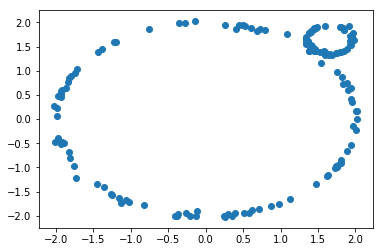

In [109]:
%matplotlib inline
from matplotlib import pyplot as plt
data = np.array(X)
data_X, data_Y = data[:, 0], data[:, 1]
print(data_X.shape, data_Y.shape)
plt.scatter(data_X, data_Y)

In [110]:
np.save("data.npy", data)